## Зачётная задача № 14

# Интерполяция. Длина тормозного пути

(Моулер) В следующей таблице приведены данные о длине тормозного пути  некоторого автомобиля в зависимости от его скорости  в начале пути:
```
  v      d
  0      0
 10      5
 20     20
 30     46
 40     70
 50    102
 60    153
```
Какова должна быть максимальная скорость автомобиля, чтобы длина тормозного пути не превосходила бы $60$? Написать программу (скрипт), решающую задачу следующими способами:

* кусочной линейной интерполяцией,
* кусочной кубической интерполяцией,
* обратной кубической интерполяцией. 

Придумать и реализовать новый способ. Нарисовать графики построенных интерполянтов. Сравнить результаты.

## Решение

Что такое *интерполяция*?

Это процесс нахождения значений какой-либо функции в некоторой точке по её значениям в других точках.
Слово *интерполяция* восходит к латинскому *interpolatio*, происходящего от глагола *interpolire* (*inter*(*между*) + *polire*(*шлифовать, полировать*)).

Таким образом, *интерполянт* - это функция, сглаживающая заданные точки.

***

Рассмотрим некоторые виды интерполяции на примере данной задачи.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate

Зададим начальные данные о длине тормозного пути и соответствующей ему скорости следующим образом: 

In [3]:
d = np.array([0, 5, 20, 46, 70, 102, 153])
V = np.array([0, 10, 20, 30, 40, 50, 60])

## Кусочно-линейная интерполяция

Найдём максимально возможную скорость, а затем построим график кусочно-линейного интерполянта:

In [4]:
g = interpolate.interp1d(d, V, kind = 'linear')
g(60)

array(35.83333333)

Итак, максимальная скорость должна быть $<$ $35.84$.

Построим график:

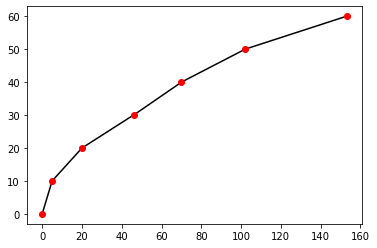

In [5]:
Dist = np.linspace(0, 153, 500)
Vec = g(Dist)
plt.plot(Dist, Vec, 'k')
plt.plot(d, V, 'or')
pass

## Кусочно-кубическая интерполяция

Теперь найдём максимально возможную скорость методом кубической интерполяции:

In [6]:
f = interpolate.interp1d(d, V, kind = 'cubic')
f(60)

array(36.00342639)

Метод кубической интерполяции показывает, что скорость автомобиля должна быть $<=$ $36.00342639$.

Построим график кубического сплайна:

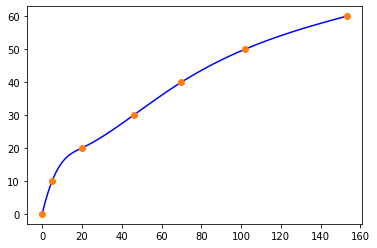

In [7]:
Dist1 = np.linspace(0, 153, 500)
Vec1 = f(Dist1)
plt.plot(Dist1, Vec1, 'b')
plt.plot(d, V, 'o', color = "tab:orange")
pass

## Обратная кубическая интерполяция

Построим обратный кубический интерполянт. Для этого поменяем $V$ и $d$ местами:

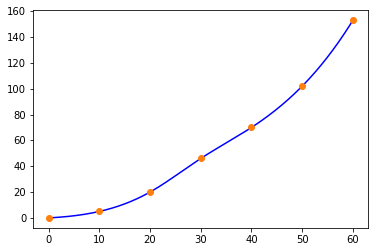

In [8]:
j = interpolate.interp1d(V, d, kind = 'cubic')
Vec2 = np.linspace(0, 60, 500)
Dist2 = j(Vec2)
plt.plot(Vec2, Dist2, 'b')
plt.plot(V, d, 'o', color = 'tab:orange')
pass

Сравним результаты прямой и обратной кубических интерполяций, подставив в $j$ значение максимальной скорости из $f$($60$), полученной при помощи кубической интерполяции:

In [9]:
j(36.00342639)

array(60.32398532)

Результат $60.32398532$ более чем на $0,3$ единицы больше требуемого результата в $60$ единиц. 
Найдём другие значения скорости при помощи нахождения интерполяционного многочлена для $f$:

## Интерполяционный многочлен

* Для начала найдём коэффициенты интерполяционного многочлена, воспользовавшись функцией $polyfit$:

In [10]:
f1 = np.polyfit(d, V, 6) # 6 + 1, т.к n+1
f1 

array([-9.09170761e-10,  3.71982217e-07, -5.69439974e-05,  4.10077119e-03,
       -1.43048892e-01,  2.61961353e+00,  2.18240781e-12])

* Функция $polyval$ поможет нам найти значение скорости при наибольшем тормозном пути в $60$ единиц засчёт интерполяционного многочлена:

In [11]:
pl = np.polyval(f1, 60)
pl

36.80827351484242

Построим график интерполяционного многочлена и оценим его:

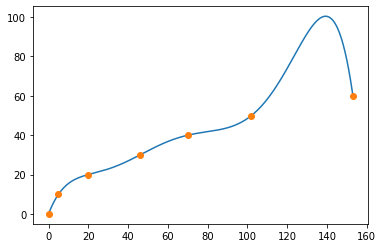

In [12]:
Dist3 = np.linspace(0, 153, 500)
plt.plot(Dist3, np.polyval(f1, Dist3))
plt.plot(d, V, 'o')
pass

По графику видно, что он далёк от действительных значений, поскольку на графике происходит сильный скачок, а затем понижение, чего быть просто не может. При высоких степенях происходит осциллирование точек, а это в свою очередь понижает точность.

Вычислим значение тормозного пути при скорости, найденной путём применения $polyval$($f1,60$).
Подставим $pl$ в функцию обратного кубического интерполянта:

In [13]:
j(pl)

array(62.20781598)

Значение $62.20781598$ тормозного пути больше требуемого значения более чем на $2$ единицы. Разница по сравнению с результатом $60.32398532$ заметно возросла.

Подведём небольшой итог по приведённым интерполяциям:

## Подытог:

* Кусочно-линейная интерполяция : максимальная скорость будет равняться $35.83333333$ , функция не плавная, менее реальные значения изменения данных
* Кусочно-кубическая интерполяция : максимальная скорость будет равняться $36.00342639$ , плавная функция, близкие к реальным значения изменения данных
* Интерполяционный многочлен: максимальная скорость будет равняться $36.80827351484242$ , плавная функция, однако с повышением степени происходит осцилляция точек (скачок), что достаточно сильно понижает точность (более 2 единиц) и приводит к отдалению от реальных значений данных

Воспользуемся ещё одним кусочно-полиномиальным интерполянтом:

## Эрмитов кусочно-кубический интерполянт

Эрмитов кусочно-кубический интерполянт $pchip$ имеет непрерывную первую производную, но, в отличие от кубического сплайна, может иметь разрывную вторую производную. С другой стороны, $pchip$ может лучше воспроизводить поведение данных, чем кубический сплайн(особенно для негладких данных): интерполянт является монотонным на всех участках, где данные монотонны, и имеет экстремумы в тех точках, где имеются экстремумы данных.

Эрмитов кусочно-кубический интерполянт мы построим при помощи функции **PchipInterpolator** модуля **interpolate**:

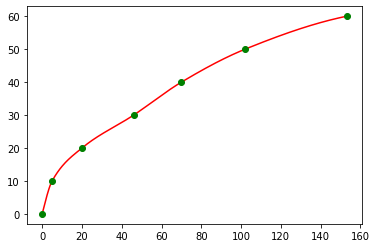

In [14]:
pchip = interpolate.pchip(d, V)
Dist4 = np.linspace(0, 153, 500)
Vec4 = pchip(Dist4)
plt.plot(Dist4, Vec4,'r')
plt.plot(d, V, 'og')
pass

Вычислим максимально возможную скорость:

In [15]:
pchip(60)

array(35.98756535)

Итак, максимальная скорость должна быть $<=$ $35.98756535$.

По графику видно, что график этого интерполянта плавнее на промежутках скорости от $0$ до $20$ чем график кубического сплайна.

Построим график кусочно-линейного интерполянта, кусочно-кубического интерполянта, интерполяционного многочлена и Эрмитова кусочно-кубического интерполянта и сравним их:

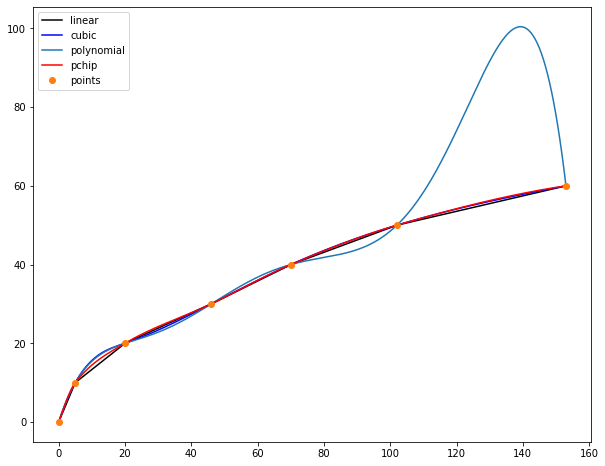

In [16]:
linear = interpolate.interp1d(d, V, kind = 'linear')
cubic =  interpolate.interp1d(d, V, kind = 'cubic')
poly = np.polyfit(d, V, 6)
pchip1 = interpolate.pchip(d, V)

xx = np.linspace(0, 153, 500)
plt.figure(figsize = (10, 8))
plt.plot(xx, linear(xx), 'k', label = 'linear')
plt.plot(xx, cubic(xx), 'b', label = 'cubic')
plt.plot(xx, np.polyval(poly, xx), label = 'polynomial')
plt.plot(xx, pchip(xx),'r', label = 'pchip')
plt.plot(d, V, 'o', color = 'tab:orange', label = 'points')

plt.legend(loc = 2)

pass

Как можно заметить, график Эрмитова кусочно-кубического интерполянта оказался наиболее плавным, и его значения будут наиболее приближены к реальным.

Подведём итоги:

## Вывод:

* Как можно заметить, наиболее точным оказался Эрмитов кусочно-кубический интерполянт, он наиболее плавный и близок к реальным значениям данных, обходя по этим параметрам метод кусочно-кубической интерполяции. Максимально возможная скорость, чтобы длина тормозного пути не превосходила бы $60$, должна быть $<=$ $35.98756535$.
* Различные методы интерполяции дают различные выходные требуемые значения.
* Как уже было сказано в подытоге, интерполяционный многочлен удобен в использовании (лишь на малых степенях), но при повышении его степени интерполяционный многочлен начинает сильно осциллировать, что можно увидеть на графике выше(он выдаёт нереалистичные значения).